# Assignment 9 - Zhengxi Shen

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Columia/APAN 5420/XYZloan_default_selected_vars.csv')

print(df.shape)
df.head()

Mounted at /content/drive
(80000, 89)


,Unnamed: 0.1,Unnamed: 0,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


In [3]:
# Evaluate the number of normal and abnormal data contain in this dataset
df['loan_default'].value_counts()

0    64512
1    15488
Name: loan_default, dtype: int64

# Feature Engineering

### Split Train and Test data first
#### Test data will be used like furture data we are going to deal in real life data analysis, so we should not include any information, trend or pattern from 'unknown' data during our model training. So as, all the feature engineering will based on traning data and directly applied to test data if this can be done.

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.3, random_state = 123)

### Detect special values lik 'NaN', '-99', '-98', '0'. And keep them as a category since they usually contain some useful system information.

In [5]:
# '-99', '-98'
mask = (train == -99) | (train == -98)

columns_with_sepcial_val = df.columns[mask.any()]

print(columns_with_sepcial_val)

Index(['PA022', 'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018',
       'CD071', 'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108',
       'CD113', 'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123',
       'CD130', 'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152',
       'CD153', 'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170',
       'CD172', 'CD173'],
      dtype='object')


In [6]:
# '0'
columns_with_sepcial_val = train.columns[(train == 0).any()]

print(columns_with_sepcial_val)

Index(['Unnamed: 0.1', 'loan_default', 'AP009', 'TD001', 'TD002', 'TD005',
       'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015', 'TD023', 'TD024',
       'TD025', 'TD026', 'TD027', 'TD028', 'CR009', 'CR012', 'CR018', 'PA022',
       'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071',
       'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113',
       'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130',
       'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153',
       'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172',
       'CD173', 'MB005'],
      dtype='object')


In [7]:
# 'NaN'
columns_with_nan = train.columns[train.isnull().any()]

print(columns_with_nan)

Index(['TD022', 'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029',
       'TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'PA022',
       'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071',
       'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113',
       'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130',
       'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153',
       'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172',
       'CD173', 'MB005'],
      dtype='object')


In [8]:
# Create a full list of all the column contain special values

mask = (train == -99) | (train == -98) | train.isnull() | (train == 0)

columns_with_sepcial_val = train.columns[mask.any()]

print(columns_with_sepcial_val)

Index(['Unnamed: 0.1', 'loan_default', 'AP009', 'TD001', 'TD002', 'TD005',
       'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015', 'TD022', 'TD023',
       'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029', 'TD044', 'TD048',
       'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'CR009', 'CR012', 'CR018',
       'PA022', 'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018',
       'CD071', 'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108',
       'CD113', 'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123',
       'CD130', 'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152',
       'CD153', 'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170',
       'CD172', 'CD173', 'MB005'],
      dtype='object')


In [9]:
# Select only the numerical columns to do binning
numerical_columns = train[columns_with_sepcial_val].select_dtypes(include=['float']).columns.tolist()

print(numerical_columns)

['TD022', 'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029', 'TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'PA022', 'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071', 'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113', 'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130', 'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153', 'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172', 'CD173', 'MB005']


In [10]:
# Write a function to do binning while keep the special values

def binWithSwpcial(column, data):
  data[column + '_D'] = pd.qcut(data[column], 10, duplicates = 'drop').cat.add_categories('NoData')
  data[column + '_D'] = data[column + '_D'].fillna('NoData').astype('str')
  data.loc[data[column]==-99, column + '_D'] = -99
  data.loc[data[column]==-98, column + '_D'] = -98
  data.loc[data[column]==0, column + '_D'] = 0

In [11]:
# Apply the binning function to numerical columns selected above

for c in numerical_columns:
  if c != 'TD055':
    binWithSwpcial(c, train)

In [12]:
train[train['MB005_D'] == 'NoData']

,Unnamed: 0.1,Unnamed: 0,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD160_D,CD162_D,CD164_D,CD166_D,CD167_D,CD169_D,CD170_D,CD172_D,CD173_D,MB005_D
36280,36280,36281,36281,0,43,2,3,12,2017/6/1 17:09,h5,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,NoData
64984,64984,64985,64985,0,31,1,4,3,2017/4/5 5:27,android,...,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData
69410,69410,69411,69411,0,48,1,1,12,2017/4/27 10:11,h5,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,NoData
17171,17171,17172,17172,0,42,1,1,12,2017/7/14 18:35,android,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,NoData
16172,16172,16173,16173,0,37,1,1,12,2017/6/30 15:16,api,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,NoData
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63232,63232,63233,63233,0,23,1,3,12,2017/6/21 18:01,android,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,NoData
12221,12221,12222,12222,1,24,2,1,12,2017/5/18 18:28,h5,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,NoData
5474,5474,5475,5475,0,23,1,3,12,2017/7/15 12:22,h5,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,NoData
6578,6578,6579,6579,0,22,2,1,12,2017/5/26 11:56,ios,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,NoData


In [13]:
# Test if TD055 only contains NaN value (The answer is yes, that's why we cannot binning it)
print(train['TD055'].isnull().sum())

# We just change NaN into 'NoData' as for all other numerical data
train['TD055'].fillna('NoData')


56000


25183    NoData
37715    NoData
38347    NoData
4589     NoData
78269    NoData
          ...  
63206    NoData
61404    NoData
17730    NoData
28030    NoData
15725    NoData
Name: TD055, Length: 56000, dtype: object

### Apply the binning and other engineering we did with train data to testdata with the same criteria

In [14]:
# New functiopn to apply the binning of train data to test data
def applyBinning(column, train_data, test_data):
    # Create bins based on the training data
    train_data[column + '_D'], bins = pd.qcut(train_data[column], 10, duplicates = 'drop', retbins=True)
    train_data[column + '_D'] = train_data[column + '_D'].cat.add_categories('NoData')
    train_data[column + '_D'] = train_data[column + '_D'].fillna('NoData').astype('str')
    train_data.loc[train_data[column]==-99, column + '_D'] = '-99'
    train_data.loc[train_data[column]==-98, column + '_D'] = '-98'
    train_data.loc[train_data[column]==0, column + '_D'] = '0'

    # Apply the same bins to the test data
    test_data[column + '_D'] = pd.cut(test_data[column], bins, include_lowest=True)
    test_data[column + '_D'] = test_data[column + '_D'].cat.add_categories('NoData')
    test_data[column + '_D'] = test_data[column + '_D'].fillna('NoData').astype('str')
    test_data.loc[test_data[column]==-99, column + '_D'] = '-99'
    test_data.loc[test_data[column]==-98, column + '_D'] = '-98'
    test_data.loc[test_data[column]==0, column + '_D'] = '0'


for c in numerical_columns:
  if c != 'TD055':
    applyBinning(c, train, test)

In [15]:
test['CD160_D'].value_counts()

(0.0, 2.0]        3217
(3.0, 5.0]        2752
(12.0, 17.0]      2506
(25.0, 1061.0]    2305
(5.0, 7.0]        2258
(9.0, 12.0]       2247
0                 2082
(17.0, 25.0]      2066
(7.0, 9.0]        1947
(2.0, 3.0]        1503
-99                991
NoData             126
Name: CD160_D, dtype: int64

In [16]:
train['CD160_D'].value_counts()

(0.0, 2.0]        7566
(3.0, 5.0]        6371
(12.0, 17.0]      5677
(5.0, 7.0]        5447
(25.0, 1061.0]    5362
(9.0, 12.0]       5215
0                 4903
(17.0, 25.0]      4817
(7.0, 9.0]        4530
(2.0, 3.0]        3541
-99               2316
NoData             255
Name: CD160_D, dtype: int64

### Add back the original categorical column that does not need binning

In [17]:
df_catg = df.loc[:, ~df.columns.isin(numerical_columns)]

df_catg.head()

,Unnamed: 0.1,Unnamed: 0,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,TD015,CR004,CR005,CR009,CR012,CR015,CR017,CR018,CR019,MB007
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,2,2,1,35807,0,4,4,3,2,IPHONE7
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,0,3,1,7254,0,6,7,6,11,WEB
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,2,2,2,30377,0,2,2,2,3,WEB
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,...,0,2,1,0,0,5,7,7,8,OPPO
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,...,0,4,2,0,0,6,8,7,11,WEB


In [18]:
len(numerical_columns)

58

In [19]:
column_D = train.filter(regex = '_D$').columns.tolist()
column_nonD = df_catg.columns.tolist()

column_D.extend(column_nonD)

len(column_D)

88

## WOE

In [20]:
# Filter out the 'target' column and binned feature

train_bin = train[column_D]
test_bin = test[column_D]

print(len(train_bin.columns))
print(test_bin.columns)

88
Index(['TD022_D', 'TD023_D', 'TD024_D', 'TD025_D', 'TD026_D', 'TD027_D',
       'TD028_D', 'TD029_D', 'TD044_D', 'TD048_D', 'TD051_D', 'TD054_D',
       'TD061_D', 'TD062_D', 'PA022_D', 'PA023_D', 'PA028_D', 'PA029_D',
       'PA030_D', 'PA031_D', 'CD008_D', 'CD018_D', 'CD071_D', 'CD072_D',
       'CD088_D', 'CD100_D', 'CD101_D', 'CD106_D', 'CD107_D', 'CD108_D',
       'CD113_D', 'CD114_D', 'CD115_D', 'CD117_D', 'CD118_D', 'CD120_D',
       'CD121_D', 'CD123_D', 'CD130_D', 'CD131_D', 'CD132_D', 'CD133_D',
       'CD135_D', 'CD136_D', 'CD137_D', 'CD152_D', 'CD153_D', 'CD160_D',
       'CD162_D', 'CD164_D', 'CD166_D', 'CD167_D', 'CD169_D', 'CD170_D',
       'CD172_D', 'CD173_D', 'MB005_D', 'Unnamed: 0.1', 'Unnamed: 0', 'id',
       'loan_default', 'AP001', 'AP002', 'AP003', 'AP004', 'AP005', 'AP006',
       'AP007', 'AP008', 'AP009', 'TD001', 'TD002', 'TD005', 'TD006', 'TD009',
       'TD010', 'TD013', 'TD014', 'TD015', 'CR004', 'CR005', 'CR009', 'CR012',
       'CR015', 'CR017', 'CR0

In [21]:
! pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.2 MB/s eta 0:00:00


In [43]:
# Run WOE on train and test data

column_woe = train_bin.drop('loan_default', axis = 1).columns.tolist()

train_woe = pd.DataFrame(train_bin['loan_default'])
test_woe = pd.DataFrame(test_bin['loan_default'])

import category_encoders as ce

ec = ce.WOEEncoder()

y = train_bin['loan_default']

for x in column_woe:
  X = train_bin[[x]]
  X_test = test_bin[[x]]
  y = train_bin['loan_default']

  ec = ce.WOEEncoder()
  X_cleaned = ec.fit_transform(X, y)
  X_test_cleaned = ec.transform(X_test)

  train_woe[x + '_WOE'] = X_cleaned[x]
  test_woe[x + '_WOE'] = X_test_cleaned[x]

In [44]:
train_woe.head()

,loan_default,TD022_D_WOE,TD023_D_WOE,TD024_D_WOE,TD025_D_WOE,TD026_D_WOE,TD027_D_WOE,TD028_D_WOE,TD029_D_WOE,TD044_D_WOE,...,TD015_WOE,CR004_WOE,CR005_WOE,CR009_WOE,CR012_WOE,CR015_WOE,CR017_WOE,CR018_WOE,CR019_WOE,MB007_WOE
25183,0,-0.037068,-0.169862,-0.158714,0.019573,0.015507,0.014549,0.013801,-0.00007,-0.00007,...,0,4,2,0,0,6,3,2,3,-0.035602
37715,0,-0.270408,-0.466832,-0.639828,-0.770334,-0.882776,-0.904310,-0.879060,-0.00007,-0.00007,...,0,4,6,1500,0,6,3,3,3,-0.035602
38347,0,-0.270408,-0.466832,-0.057438,0.019573,0.015507,0.014549,0.013801,-0.00007,-0.00007,...,0,2,1,5000,0,5,8,8,11,-0.035602
4589,1,-0.037068,-0.169862,0.187156,0.019573,0.015507,0.014549,0.013801,-0.00007,-0.00007,...,2,2,1,2700,0,2,2,2,2,-0.035602
78269,0,-0.037068,-0.170158,-0.205099,0.019573,0.015507,0.014549,0.013801,-0.00007,-0.00007,...,0,1,1,3800,0,5,1,1,2,-0.035602


In [24]:
test_woe.head()

,loan_default,TD022_D_WOE,TD023_D_WOE,TD024_D_WOE,TD025_D_WOE,TD026_D_WOE,TD027_D_WOE,TD028_D_WOE,TD029_D_WOE,TD044_D_WOE,...,TD015_WOE,CR004_WOE,CR005_WOE,CR009_WOE,CR012_WOE,CR015_WOE,CR017_WOE,CR018_WOE,CR019_WOE,MB007_WOE
23438,0,0.403689,0.110054,-0.158714,0.019573,0.015507,0.014549,0.013801,-0.00007,-0.00007,...,0,4,2,23990,0,6,8,7,7,-0.053471
78749,0,-0.270408,-0.466832,-0.639828,0.019573,0.015507,0.014549,0.013801,-0.00007,-0.00007,...,1,1,1,24395,0,4,7,8,11,-0.035602
43994,1,-0.037068,0.609647,0.086150,0.019573,0.015507,0.014549,0.013801,-0.00007,-0.00007,...,1,3,1,22035,0,4,2,0,3,0.024517
25959,1,-0.037068,-0.170158,-0.057438,0.019573,0.015507,0.014549,0.013801,-0.00007,-0.00007,...,0,2,1,36400,0,4,7,7,10,-0.035602
20526,1,0.221191,0.164555,-0.205099,0.019573,0.015507,0.014549,0.013801,-0.00007,-0.00007,...,2,4,1,35000,0,5,7,7,11,-0.053471


## Regularization with Lasso

In [27]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [36]:
# Seperate the predictors and target for Lasso process
X_lasso = train_woe.drop('loan_default', axis = 1)
y_lasso = train_woe['loan_default']

# Nomalize predictors before doing Lasso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_lasso)

lasso = Lasso(alpha=0.01)

lasso.fit(X_scaled, y_lasso)
# Only train data need to do Lasso

Lasso(alpha=0.01)

In [37]:
# Get the coefficients of the features from the LASSO model
lasso_coefficients = lasso.coef_

# Create a DataFrame to display the coefficients and corresponding feature names
feature_coefficients = pd.DataFrame({'Feature': X_lasso.columns, 'Coefficient': lasso_coefficients})

# Filter and view the features with non-zero coefficients (features retained by LASSO)
selected_features = feature_coefficients[feature_coefficients['Coefficient'] != 0]
print(selected_features)

        Feature  Coefficient
16  PA028_D_WOE     0.008042
17  PA029_D_WOE     0.001737
19  PA031_D_WOE     0.002676
27  CD106_D_WOE     0.001763
30  CD113_D_WOE     0.007062
31  CD114_D_WOE     0.002725
33  CD117_D_WOE     0.000072
35  CD120_D_WOE     0.005832
37  CD123_D_WOE     0.006599
47  CD160_D_WOE     0.002369
49  CD164_D_WOE     0.000715
56  MB005_D_WOE     0.011788
61    AP002_WOE    -0.004241
62    AP003_WOE    -0.028371
63    AP004_WOE     0.029806
64    AP005_WOE     0.113920
66    AP007_WOE     0.002723
69    TD001_WOE     0.002439
71    TD005_WOE     0.012645
73    TD009_WOE     0.010521
74    TD010_WOE     0.001104
75    TD013_WOE     0.026629
82    CR015_WOE    -0.006999
86    MB007_WOE     0.007334


In [54]:
# Gnerate the final train data with WOE predictors after Lasso and the target('loan_default')

selected_features_lasso = selected_features['Feature'].values

train_woe = train_woe[selected_features_lasso.tolist() + ['loan_default']]

train_woe

,PA028_D_WOE,PA029_D_WOE,PA031_D_WOE,CD106_D_WOE,CD113_D_WOE,CD114_D_WOE,CD117_D_WOE,CD120_D_WOE,CD123_D_WOE,CD160_D_WOE,...,AP005_WOE,AP007_WOE,TD001_WOE,TD005_WOE,TD009_WOE,TD010_WOE,TD013_WOE,CR015_WOE,MB007_WOE,loan_default
25183,0.331600,0.366272,-0.120578,0.223677,0.254594,0.211442,-0.186089,-0.361356,-0.375942,0.007397,...,0.000000,3,2,3,3,1,3,6,-0.035602,0
37715,0.359577,0.327790,0.341331,-0.197759,-0.174589,-0.197759,-0.186089,-0.177131,-0.146719,0.086597,...,0.000000,2,0,0,0,0,0,6,-0.035602,0
38347,0.135378,0.054013,0.341331,-0.020658,0.006361,0.009510,-0.036161,-0.177131,-0.146719,-0.072791,...,0.000000,2,0,0,2,1,2,5,-0.035602,0
4589,-0.141461,-0.121659,-0.120578,0.223677,0.254594,0.211442,0.154200,0.157115,0.086381,0.007397,...,0.000000,5,3,3,6,1,9,2,-0.035602,1
78269,-0.141461,-0.121659,-0.120578,0.103685,-0.050945,0.082405,0.132570,0.117257,0.168921,-0.104774,...,0.000000,5,1,1,2,1,2,5,-0.035602,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63206,0.135378,-0.121659,0.341331,-0.118598,-0.174589,-0.106697,0.148548,0.157115,0.168921,0.026685,...,0.000000,2,2,6,13,3,14,2,-0.053471,0
61404,-0.141461,-0.121659,-0.120578,0.057710,0.095688,0.093382,0.026798,0.088931,0.028301,-0.207236,...,0.322052,5,2,2,2,0,2,5,-0.035602,0
17730,-0.141461,-0.121659,-0.120578,-0.197759,-0.174589,-0.197759,0.154200,0.157115,0.086381,0.086597,...,0.034370,3,2,2,2,1,4,6,-0.080625,0
28030,0.135378,0.327790,0.341331,-0.197759,-0.174589,-0.197759,-0.340813,-0.361356,-0.375942,0.142644,...,0.000000,5,0,2,5,4,7,5,-0.053471,1


## Model training - GBM with H2O


Gradient Boosting Machine (GBM) is a powerful machine learning algorithm used for both regression and classification tasks. It sequentially builds an ensemble of weak learners, typically decision trees, by minimizing the loss function's gradient during training. Each subsequent tree corrects the errors made by the previous ones, leading to improved predictions. GBM leverages boosting, where weak models are weighted based on their performance. It handles non-linear relationships, feature interactions, and outliers well, achieving high accuracy. However, it is prone to overfitting, and hyperparameter tuning is crucial for optimal performance.

In [55]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.42.0.2-py2.py3-none-any.whl size=249153909 sha256=7c94588c8a339c9871ab8aa33f00c0648adf7ecb0018ecd58355b0eccdc005b6
  Stored in directory: /root/.cache/pip/wheels/31/f7/e0/e32942d9f76cb1cb14c949b7772eb78979d2e0132aae6c6780
Successfully built h2o


In [56]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpsfvi4x4_
  JVM stdout: /tmp/tmpsfvi4x4_/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpsfvi4x4_/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_unknownUser_za56c5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [57]:
from h2o.estimators import H2OGradientBoostingEstimator
target = 'loan_default'

In [58]:
predictors = train_woe.filter(regex = '_WOE$').columns.tolist()

In [59]:
len(predictors)

24

### Run a small smaple dataset first

In [60]:
# Split the smaple sample
train_smpl = train_woe.sample(frac=0.1, random_state=1)
test_smpl = test_woe.sample(frac=0.1, random_state=1)

# Trandfer the data to h2o's frame
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [61]:
# Small sample random forest model training
gbm_v1 = H2OGradientBoostingEstimator(
        model_id = 'gbm_v1',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        max_depth=5,
        learn_rate=0.1,
        seed=1234)
gbm_v1.train(predictors,target,training_frame=train_hex)

gbm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: gbm_v1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    300                300                         71843                  5            5            5             6             23            14.33

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.08235677604331104
RMSE: 0.2869787031180381
MAE: 0.20654966268800437
RMSLE: 0.20169751508228112
Mean Residual Deviance: 0.08235677604331104

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.1270083136753829
RMSE: 0.3563822578010624
MAE: 0.25599764836998257
RMSLE: 0.25318545884653515
Mean Residual Deviance: 0.1270083136753829

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.255995  0.00831671  0.255461      0.248503      0.273256      0.250722      0.263588      0.255894      0.246173      0.252811      0.262889      0.250652
mean_residual_deviance  0.126918  0.00534766  0.126296      0.12276       0.138688      0.127016      0.128671      0.129339      0.119652      0.124511      0.130149      0.122102
mse                     0.126918  0.00534766  0.126296      0.12276       0.138688      0.127016      0.128671      0.129339      0.119652      0.124511      0.130149      0.122102
r2                      0.17789   0.0381173   0.120916      0.162036      0.121977      0.193257      0.183475      0.152761      0.206811      0.232597      0.186569      0.218502
residual_deviance       0.126918  0.00534766  0.126296      0.12276       0.138688      0.127016      0.128671      0.129339      0.119652      0.124511      0.130149      0.122102
rmse                    0.356186  0.00744769  0.355381      0.350371      0.372408      0.356392      0.358708      0.359638      0.345908      0.352861      0.360762      0.349431
rmsle                   0.253016  0.0052856   0.252104      0.25013       0.263757      0.252182      0.254857      0.257059      0.245675      0.248796      0.256965      0.248636

Scoring History: 
     timestamp            duration          number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------------  -----------------  -------------------  -------------------  -------------------
     2023-07-26 17:07:34  1 min  5.285 sec  0.0                0.3930048017959702   0.3089055484693967   0.15445277423468984
     2023-07-26 17:07:34  1 min  5.457 sec  1.0                0.3848853087447304   0.3022570507654122   0.14813670088752645
     2023-07-26 17:07:34  1 min  5.505 sec  2.0                0.3781451750760927   0.2962905000815434   0.1429937734333288
     2023-07-26 17:07:34  1 min  5.530 sec  3.0                0.372503179689503    0.2908881095317858   0.13875861887879012
     2023-07-26 17:07:34  1 min  5.555 sec  4.0                0.36777620766231023  0.28596223575994373  0.13525933892247075
     2023-07-26 17:07:34  1 min  5.587 sec  5.0                0.3636630362855969   0.28145436467070667  0.13225080396045935
     2023-07-26 17:07:34  1 min  5.621 sec  6.0                0.36033360621595695  0.27740911430280124  0.1298403077685963
     2023-07-26 17:07:34  1 min  5.650 sec  7.0                0.35748497737890356  0.2737317184531795   0.12779550905159517
     2023-07-26 17:07:34  1 min  5.684 sec  8.0               

In [62]:
# Model prediction and comparation to the test y
predictions = gbm_v1.predict(test_hex)
test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
test_scores.head()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,loan_default,predict
0,1,0.322600
1,0,0.114921
2,0,0.519701
3,1,0.090607
4,0,0.254288


In [63]:
# Generate a function to draw ROC curve and precision - recall curve
def ROC_AUC(my_result,df,target):
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    # ROC
    y_actual = df[target].as_data_frame()
    y_pred = my_result.predict(df).as_data_frame()
    fpr = list()
    tpr = list()
    roc_auc = list()
    fpr,tpr,_ = roc_curve(y_actual,y_pred)
    roc_auc = auc(fpr,tpr)

    # Precision-Recall
    average_precision = average_precision_score(y_actual,y_pred)

    # plotting
    plt.figure(figsize=(10,4))

    # ROC
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (aare=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: AUC={0:0.4f}'.format(roc_auc))
    plt.legend(loc='lower right')

    # Precision-Recall
    plt.subplot(1,2,2)
    precision,recall,_ = precision_recall_curve(y_actual,y_pred)
    plt.step(recall,precision,color='b',alpha=0.2,where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))
    plt.show()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


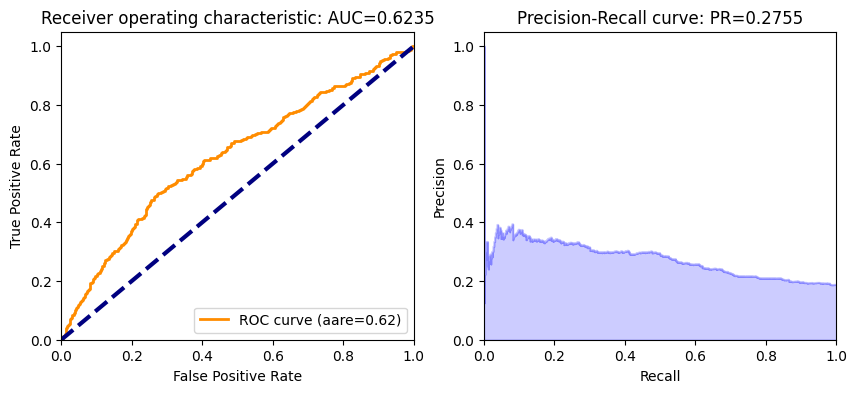

In [64]:
ROC_AUC(gbm_v1,test_hex,'loan_default')

### Since the model perform well with the small sample data, now we can use the entire train data to train the model

In [65]:
# Tranfer the wholde data to h2o frame
train_hex = h2o.H2OFrame(train_woe)
test_hex = h2o.H2OFrame(test_woe)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [66]:
# Train the random forest model with full training data
gbm_full = H2OGradientBoostingEstimator(
        model_id = 'gbm_v1',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        max_depth=5,
        learn_rate=0.1,
        seed=1234
)

gbm_full.train(predictors, target, training_frame = train_hex)

gbm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: gbm_v1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    143                143                         49316                  0            5            4.96504       1             32            22.6923

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.11057239032806375
RMSE: 0.33252427028423615
MAE: 0.23423410759027183
RMSLE: 0.23337867927235023
Mean Residual Deviance: 0.11057239032806375

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.11692800160149325
RMSE: 0.34194736671232495
MAE: 0.24122025271556008
RMSLE: 0.24027662877868722
Mean Residual Deviance: 0.11692800160149325

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.241213  0.00290497  0.237731      0.238553      0.246436      0.236805      0.241634      0.243688      0.242321      0.241029      0.241145      0.242785
mean_residual_deviance  0.116925  0.00264723  0.112807      0.115354      0.120977      0.112946      0.117541      0.118979      0.117832      0.116803      0.11935       0.11666
mse                     0.116925  0.00264723  0.112807      0.115354      0.120977      0.112946      0.117541      0.118979      0.117832      0.116803      0.11935       0.11666
r2                      0.253578  0.00996589  0.270549      0.249492      0.258296      0.258884      0.248619      0.253401      0.251174      0.234087      0.263384      0.247896
residual_deviance       0.116925  0.00264723  0.112807      0.115354      0.120977      0.112946      0.117541      0.118979      0.117832      0.116803      0.11935       0.11666
rmse                    0.341923  0.00387749  0.335867      0.339638      0.347818      0.336074      0.342842      0.344934      0.343267      0.341765      0.34547       0.341556
rmsle                   0.240264  0.0019118   0.236982      0.238712      0.243144      0.237515      0.241064      0.241299      0.241098      0.241076      0.241027      0.240724

Scoring History: 
     timestamp            duration          number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------------  -----------------  -------------------  -------------------  -------------------
     2023-07-26 17:12:49  3 min  5.697 sec  0.0                0.3958428604295512   0.3133831403061483   0.15669157015304913
     2023-07-26 17:12:49  3 min  5.810 sec  1.0                0.38747607571215725  0.3064843387021018   0.15013770924929343
     2023-07-26 17:12:50  3 min  5.911 sec  2.0                0.3805078389893446   0.30025841190532915  0.144786215532341
     2023-07-26 17:12:50  3 min  6.009 sec  3.0                0.3747151976039296   0.29466369999546027  0.140411479315352
     2023-07-26 17:12:50  3 min  6.103 sec  4.0                0.3698846165860494   0.2895751016940922   0.13681462958700874
     2023-07-26 17:12:50  3 min  6.193 sec  5.0                0.3657995382620619   0.28496489230915906  0.1338093021927377
     2023-07-26 17:12:50  3 min  6.297 sec  6.0                0.36233577656590127  0.28071700962207147  0.13128721497961474
     2023-07-26 17:12:50  3 min  6.412 sec  7.0                0.3594640760345614   0.27693287194320665  0.1292144219593809
     2023-07-26 17:12:50  3 min  6.513 sec  8.0                

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


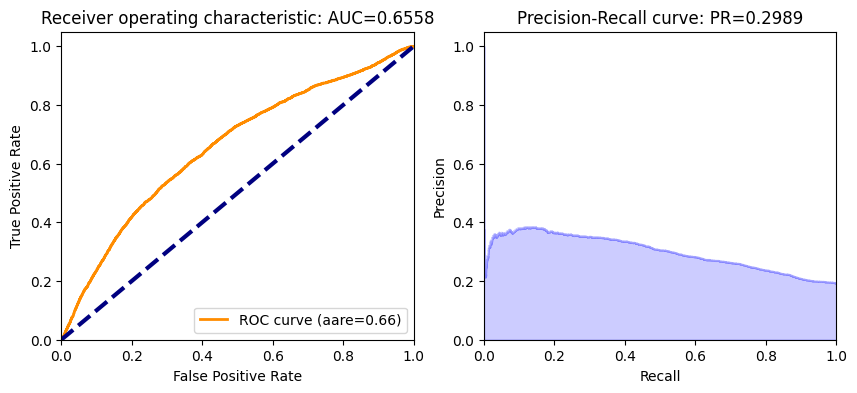

In [67]:
# Draw the ROC curve and precision - recall curve to view the model performance
ROC_AUC(gbm_full, test_hex, 'loan_default')

### Tuning Hyperparameter to improve the model performance

In [68]:
from h2o.grid import H2OGridSearch

# Define the hyperparameters to search over
hyper_params = {'ntrees': [100, 200, 300],
                'max_depth': [3, 5, 7],
                'min_rows': [50, 100, 200],
                'learn_rate': [0.01, 0.05, 0.1]
                }

gbm_tune = H2OGradientBoostingEstimator(
    nfolds = 5,
    seed = 1234
    )

grid = H2OGridSearch(model=gbm_tune, hyper_params=hyper_params)
grid.train(predictors, target, training_frame = train_hex)

best_model = grid.get_grid()[0]
best_params = best_model.params

# Evaluate the best model on the test data
performance = best_model.model_performance(test_hex)

# Print the best hyperparameters and model performance
print("Best Hyperparameters:", best_params)
print("Model Performance:", performance)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Best Hyperparameters: {'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'Grid_GBM_Key_Frame__upload_9b156b19ab94d09d7982c8fae162486f.hex_model_python_1690391106525_1_model_32', 'type': 'Key<Model>', 'URL': '/3/Models/Grid_GBM_Key_Frame__upload_9b156b19ab94d09d7982c8fae162486f.hex_model_python_1690391106525_1_model_32'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'Key_Frame__upload_9b156b19ab94d09d7982c8fae162486f.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/Key_Frame__upload_9b156b19ab94d09d7982c8fae162486f.hex'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'Key_Frame__upload_9b156b19ab94d09d7982c8fae162486f.hex', 'type':

### The Best hyperparameters from tunning are:
ntrees: 200  

max_depth: 5  

min_rows: 50

learn_rate: 0.05   

In [75]:
# Using the best hyperparameters
gbm_tune = H2OGradientBoostingEstimator(
    model_id = 'gbm_tune',
    ntrees = 200,
    min_rows = 50,
    max_depth = 5,
    learn_rate = 0.05,
    seed = 1234
)

gbm_tune.train(predictors, target, training_frame = train_hex)

gbm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: gbm_tune


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    200                200                         77937                  5            5            5             12            32            26.255

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.11127079368968147
RMSE: 0.333572771205447
MAE: 0.23464578590592258
RMSLE: 0.2339703538525331
Mean Residual Deviance: 0.11127079368968147

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2023-07-26 20:23:03  0.038 sec   0.0                0.3958428604295512   0.3133831403061483   0.15669157015304913
     2023-07-26 20:23:03  0.464 sec   1.0                0.3915670032606771   0.30992995997837613  0.1533247180425471
     2023-07-26 20:23:03  0.766 sec   2.0                0.3876604857881642   0.3066504360770008   0.15028065224151546
     2023-07-26 20:23:04  1.009 sec   3.0                0.38408701969646303  0.30352594989751064  0.14752283869931118
     2023-07-26 20:23:04  1.278 sec   4.0                0.3808240055833917   0.3005662495595004   0.14502692322857916
     2023-07-26 20:23:04  1.622 sec   5.0                0.3778296718831951   0.2977324302473239   0.1427552609553629
     2023-07-26 20:23:04  1.893 sec   6.0                0.3750824930577939   0.2950333366622882   0.14068687659845003
     2023-07-26 20:23:05  2.167 sec   7.0                0.3725730439587567   0.29246781402507     0.13881067308469364
     2023-07-26 20:23:05  2.476 sec   8.0                0.3702838529706999   0.2900231260087873   0.1371101317708269
     2023-07-26 20:23:05  2.769 sec   9.0                0.3681756465301278   0.2877016689178667   0.1355533066978776
---  ---                  ---         ---                ---                  ---                  ---
     2023-07-26 20:23:06  3.474 sec   12.0               0.3628312038908777   0.2813462871772104   0.13164648251690367
     2023-07-26 20:23:06  3.680 sec   13.0               0.361318007862388    0.2794114438286051   0.13055070280564468
     2023-07-26 20:23:06  3.826 sec   14.0               0.35991276559669294  0.27755956691450306  0.12953719883946005
     2023-07-26 20:23:07  3.949 sec   15.0               0.3586437706723639   0.2757938004906422   0.12862535424209115
     2023-07-26 20:23:11  8.008 sec   55.0               0.34150911654317473  0.24388471020671568  0.11662847668209969
     2023-07-26 20:23:15  12.113 sec  88.0               0.338110293976949    0.23914674359532456  0.11431857089317887
     2023-07-26 20:23:19  16.289 sec  110.0              0.3367747476185694   0.23783414620274965  0.11341723063355114
     2023-07-26 20:23:23  20.327 sec  139.0              0.33546007268630257  0.23647170146513274  0.11253346036669941
     2023-07-26 20:23:27  24.342 sec  182.0              0.3340222074428101   0.2350186354877766   0.11157083506496764
     2023-07-26 20:23:29  26.720 sec  200.0              0.333572771205447    0.23464578590592258  0.11127079368968147
[22 rows x 7 columns]


Variable Importances: 
variable     relative_importance    scaled_importance     percentage
-----------  ---------------------  --------------------  ---------------------
AP005_WOE    17305.015625           1.0                   0.6633351672519205
TD013_WOE    1367.723388671875      0.07903624118639736   0.052427518266342024
AP004_WOE    1200.4613037109375     0.0693707148103738    0.04601603471112458
AP003_WOE    1042.969482421875      0.060269779873

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


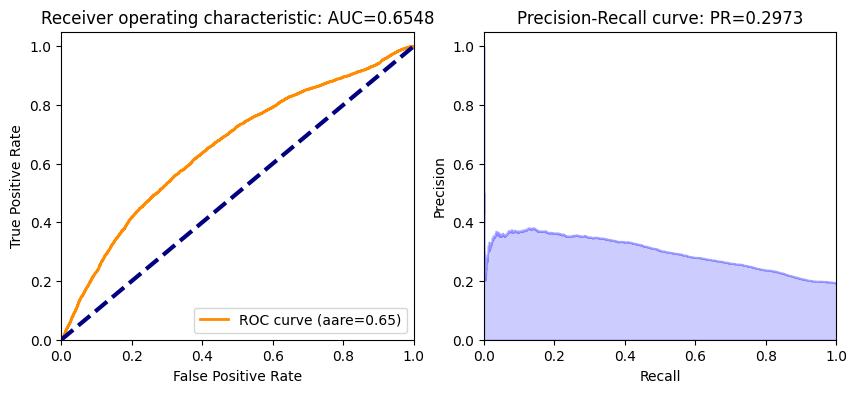

In [76]:
# Draw the ROC curve and precision - recall curve to view the model performance
ROC_AUC(gbm_tune, test_hex, 'loan_default')

Tune again since the last tuning did not improve the model performance. This is due to the default evaluation of grid search is MSE and RMSE, while lower MSE or RMSE does not directly lead to a greater AUC or Precision-Recal curve socre.

To improve the model performance, let's tuning again. This time the tuning range is generated based on previous tuning results.

In [86]:
hyper_params = {'ntrees': [200, 300, 400],
                'min_rows': [100, 125, 150],
                'learn_rate': [0.07, 0.1]
                }

gbm_model = H2OGradientBoostingEstimator(
    nfolds = 10,
    seed = 1234
    )

grid = H2OGridSearch(model=gbm_model, hyper_params=hyper_params)
grid.train(predictors, target, training_frame = train_hex)

best_model = grid.get_grid()[0]
best_params = best_model.params

# Evaluate the best model on the test data
performance = best_model.model_performance(test_hex)

# Print the best hyperparameters and model performance
print("Best Hyperparameters:", best_params)
print("Model Performance:", performance)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Best Hyperparameters: {'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'Grid_GBM_Key_Frame__upload_9b156b19ab94d09d7982c8fae162486f.hex_model_python_1690391106525_7_model_3', 'type': 'Key<Model>', 'URL': '/3/Models/Grid_GBM_Key_Frame__upload_9b156b19ab94d09d7982c8fae162486f.hex_model_python_1690391106525_7_model_3'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'Key_Frame__upload_9b156b19ab94d09d7982c8fae162486f.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/Key_Frame__upload_9b156b19ab94d09d7982c8fae162486f.hex'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'Key_Frame__upload_9b156b19ab94d09d7982c8fae162486f.hex', 'type': '

#### The best hyperparameters from the second tuning
ntrees: 200

max_depth: 5

min_rows: 125

learn_rate: 0.07

In [87]:
gbm_tune = H2OGradientBoostingEstimator(
    model_id = 'gbm_tune',
    ntrees = 200,
    min_rows = 120,
    max_depth = 5,
    learn_rate = 0.07,
    seed = 1234
)

gbm_tune.train(predictors, target, training_frame = train_hex)

gbm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: gbm_tune


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    196                196                         66909                  0            5            4.97449       1             32            22.4133

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.1109623062067901
RMSE: 0.3331100511944815
MAE: 0.2347203345839734
RMSLE: 0.233762527430868
Mean Residual Deviance: 0.1109623062067901

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2023-07-27 02:42:51  0.008 sec   0.0                0.3958428604295512   0.3133831403061483   0.15669157015304913
     2023-07-27 02:42:52  0.380 sec   1.0                0.38991799186085874  0.30855875673490973  0.1520360403768047
     2023-07-27 02:42:52  0.811 sec   2.0                0.3846957285865401   0.3040654831148152   0.14799080359272895
     2023-07-27 02:42:52  1.173 sec   3.0                0.38015816068490477  0.29993340394938633  0.14452022713532986
     2023-07-27 02:42:53  1.453 sec   4.0                0.3761030025382934   0.29602653685291963  0.14145346851831953
     2023-07-27 02:42:53  1.694 sec   5.0                0.3725170814412017   0.2923722508861018   0.13876897596547091
     2023-07-27 02:42:53  1.919 sec   6.0                0.3693495997404853   0.2889541501067579   0.13641912682845672
     2023-07-27 02:42:53  2.102 sec   7.0                0.36653620761059885  0.2857906829420743   0.13434879148956003
     2023-07-27 02:42:54  2.294 sec   8.0                0.36402701927145475  0.2827898615810222   0.1325156707596601
     2023-07-27 02:42:54  2.464 sec   9.0                0.36181464722951817  0.2799991798802678   0.13090983894982067
---  ---                  ---         ---                ---                  ---                  ---
     2023-07-27 02:42:55  3.659 sec   16.0               0.3518811932142083   0.26499987803898484  0.12382037413785497
     2023-07-27 02:42:55  3.866 sec   17.0               0.35101123126173633  0.26334087320836264  0.12320888447188015
     2023-07-27 02:42:59  7.984 sec   37.0               0.34244767453541836  0.24526577178078254  0.1172704097947158
     2023-07-27 02:43:03  12.221 sec  56.0               0.33930049490615743  0.24054079223870914  0.11512482584356339
     2023-07-27 02:43:08  16.467 sec  69.0               0.3380960274446426   0.23921334118670867  0.11430892377384852
     2023-07-27 02:43:12  20.505 sec  98.0               0.3361969434384219   0.23741045704256938  0.11302838477733745
     2023-07-27 02:43:16  24.640 sec  135.0              0.33476367237402677  0.23623341764939193  0.11206671634134474
     2023-07-27 02:43:20  28.856 sec  154.0              0.3341066432212248   0.2356612364201237   0.1116272490445548
     2023-07-27 02:43:24  32.929 sec  173.0              0.33367785560271596  0.2352854912257767   0.11134091131962696
     2023-07-27 02:43:26  34.884 sec  196.0              0.3331100511944815   0.2347203345839734   0.1109623062067901
[26 rows x 7 columns]


Variable Importances: 
variable     relative_importance    scaled_importance      percentage
-----------  ---------------------  ---------------------  ---------------------
AP005_WOE    12523.958984375        1.0                    0.6607138285001132
TD013_WOE    996.3197021484375      0.07955309526256471    0.05256183013996334
AP004_WOE    851.3858642578125      0.06798056950841255    0.04491570234352131
AP003_WOE    767.6420288085938      0.06129387917

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


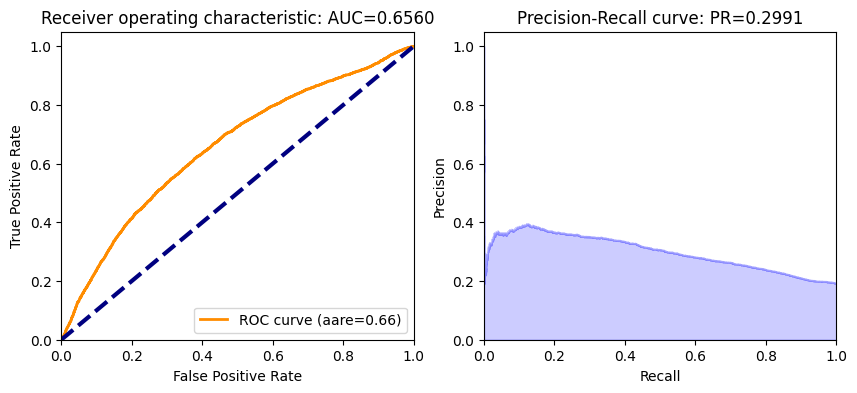

In [88]:
ROC_AUC(gbm_tune, test_hex, 'loan_default')

Great! This time we got a slight improvement on model performance with the new group of hyperparameters.

### Tunned GBM result:
We have done binning of numerical features and keep some special values(-99, -98, 0, NaN) to transform them into categorical features. Then ran WOE on all the features to make the data more suitablr for loan default detection.  
During model training, in order to improve the model performance, we tunned hyperparameters(ntrees, max_depth, min_row, learn_rate). Then we trained the GBM model with the 'best' hyperparameters according to the second tunning results.  
The final performance of the GBM 'gbm_tune' is AUC = 0.6560 and PR = 0.2991. Since we have noticed that the two calsses in the 'target' are quite uneven, where '0' is almost 3 times of '1' in train dataset. So the AUC score is not as accurate as it usually is. So we should take the PR to evaluate and compare the model performance with futher iterations.

## Model training - Deep Learning with H2O

Deep learning is a subset of machine learning that involves training artificial neural networks with multiple layers to perform complex tasks. It is inspired by the structure and functioning of the human brain. Deep learning models automatically learn hierarchical representations from data, allowing them to extract high-level features and patterns. The large number of interconnected layers enables the network to handle vast amounts of data and solve intricate problems like image recognition, natural language processing, and speech synthesis.

In [77]:
from h2o.estimators import H2ODeepLearningEstimator

dl_v1 = H2ODeepLearningEstimator(
    epochs=10,
    hidden=[50, 50],
    activation='Rectifier',
    loss='automatic',  \
    balance_classes=False,  \
    seed=1234  \
)

dl_v1.train(predictors, target, training_frame = train_hex)

deeplearning Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1690391106525_2


Status of Neuron Layers: predicting loan_default, regression, gaussian distribution, Quadratic loss, 3,851 weights/biases, 52.5 KB, 560,000 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate              rate_rms                momentum    mean_weight            weight_rms           mean_bias            bias_rms
--  -------  -------  ---------  ---------  ----  ----  ---------------------  ----------------------  ----------  ---------------------  -------------------  -------------------  -----------------------
    1        24       Input      0.0
    2        50       Rectifier  0.0        0.0   0.0   0.004000323632402191   0.001968580298125744    0.0         -0.007133251854562938  0.2504277229309082   0.1669735209202017   0.38658225536346436
    3        50       Rectifier  0.0        0.0   0.0   0.015260711769410408   0.02313569188117981     0.0         -0.0642887515198876    0.18233484029769897  0.6176986453018045   0.40290093421936035
    4        1        Linear                0.0   0.0   0.0005841280544700567  0.00026329245883971453  0.0         -0.023820212011596596  0.09226837754249573  0.22787843404463703  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.11993018013395669
RMSE: 0.3463093705546483
MAE: 0.23654904219898443
RMSLE: 0.24063625271663294
Mean Residual Deviance: 0.11993018013395669

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2023-07-26 20:28:59  0.000 sec                     0         0             0          nan              nan                  nan             nan
    2023-07-26 20:29:04  6.297 sec   10756 obs/sec     1         1             56000      0.354246         0.12549              0.234874        0.215272
    2023-07-26 20:29:10  12.379 sec  20055 obs/sec     4         4             224000     0.347702         0.120897             0.240731        0.243997
    2023-07-26 20:29:17  19.370 sec  21730 obs/sec     7         7             392000     0.348543         0.121482             0.233863        0.240336
    2023-07-26 20:29:22  23.748 sec  25071 obs/sec     10        10            560000     0.346309         0.11993              0.236549        0.250041

Variable Importances: 
variable     relative_importance    scaled_importance    percentage
-----------  ---------------------  -------------------  --------------------
AP005_WOE    1.0                    1.0                  0.13959433474207708
AP004_WOE    0.6718379259109497     0.6718379259109497   0.0937847683220359
AP003_WOE    0.42448678612709045    0.42448678612709045  0.059255950516213546
TD013_WOE    0.3242136240005493     0.3242136240005493   0.0452583851566746
CR015_WOE    0.3233196437358856     0.3233196437358856   0.045133590576356325
PA031_D_WOE  0.2731077969074249     0.2731077969074249   0.03812430122216628
CD123_D_WOE  0.2719494700431824     0.2719494700431824   0.037962605354138465
AP007_WOE    0.25726842880249023    0.25726842880249023  0.03591321516882305
PA029_D_WOE  0.25296422839164734    0.25296422839164734  0.03531237317587486
TD009_WOE    0.2512843608856201     0.2512843608856201   0.035077873188916156
---          ---                    ---                  ---
CD113_D_WOE  0.23599663376808167    0.23599663376808167  0.03294379309222496
PA028_D_WOE  0.22952120006084442    0.22952120006084442  0.03203985923169676
CD120_D_WOE  0.2223462611436844     0.2223462611436844   0.031038278406740765
CD114_D_WOE  0.22093284130096436    0.22093284130096436  0.03084097300408501
CD160_D_WOE  0.2196228802204132     0.21962288

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


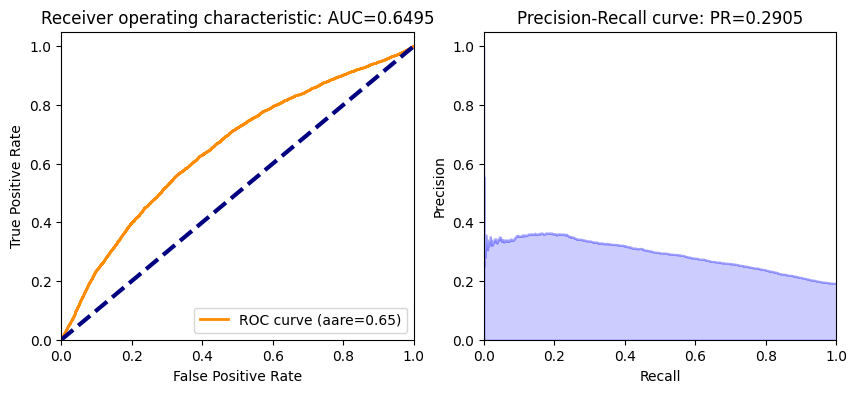

In [78]:
ROC_AUC(dl_v1, test_hex, 'loan_default')

In [81]:
hyper_params = {
    'hidden': [[50, 50], [100, 50, 100], [150, 100, 50, 100]],
    'rate': [0.01, 0.05, 0.1]
}

# Define the Deep Learning model
dl_model = H2ODeepLearningEstimator(
    epochs=10,        # Number of training iterations
    loss='automatic',  # Loss function, 'automatic' selects the appropriate one for the task
    balance_classes=False,  # Set to True for imbalanced datasets
    seed=1234  # Random seed for reproducibility
)

grid = H2OGridSearch(dl_model, hyper_params)
grid.train(predictors, target, training_frame = train_hex)

best_dl_model = grid.get_grid()[0]

print("Best Model Hyperparameters:")
print(best_dl_model.params)

deeplearning Grid Build progress: |██████████████████████████████████████████████| (done) 100%
Best Model Hyperparameters:
{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'Grid_DeepLearning_Key_Frame__upload_9b156b19ab94d09d7982c8fae162486f.hex_model_python_1690391106525_4_model_6', 'type': 'Key<Model>', 'URL': '/3/Models/Grid_DeepLearning_Key_Frame__upload_9b156b19ab94d09d7982c8fae162486f.hex_model_python_1690391106525_4_model_6'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'Key_Frame__upload_9b156b19ab94d09d7982c8fae162486f.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/Key_Frame__upload_9b156b19ab94d09d7982c8fae162486f.hex'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'Key_Frame__upload_9b156b19ab94d09d7982c8fa

In [83]:
dl_tune = H2ODeepLearningEstimator(
    hidden=[150, 100, 50, 100],  # Four hidden layers with specific number of neurons in each layer
    epochs=10,  # Number of training iterations
    rate=0.05,  # Learning rate
    loss='automatic',  # Loss function, 'automatic' selects the appropriate one for the task
    balance_classes=False,  # Set to True for imbalanced datasets
    seed=1234  # Random seed for reproducibility
)

# Train the Deep Learning model
dl_tune.train(predictors, target, training_frame=train_hex)

deeplearning Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)
/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: rate cannot be specified if adaptive_rate is enabled.
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1690391106525_5


Status of Neuron Layers: predicting loan_default, regression, gaussian distribution, Quadratic loss, 29,101 weights/biases, 353.2 KB, 480,967 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate             rate_rms                momentum    mean_weight             weight_rms           mean_bias            bias_rms
--  -------  -------  ---------  ---------  ----  ----  --------------------  ----------------------  ----------  ----------------------  -------------------  -------------------  -----------------------
    1        24       Input      0.0
    2        150      Rectifier  0.0        0.0   0.0   0.009578541549465929  0.00645475834608078     0.0         -0.0038586039846025717  0.1837477684020996   0.361438066186723    0.16915160417556763
    3        100      Rectifier  0.0        0.0   0.0   0.029241584416176192  0.024875961244106293    0.0         -0.012751369299833823   0.11985546350479126  0.9267655931921737   0.10052317380905151
    4        50       Rectifier  0.0        0.0   0.0   0.0087568016323552    0.026364900171756744    0.0         -0.02205542218720948    0.1186474859714508   0.9525775963909173   0.05623862147331238
    5        100      Rectifier  0.0        0.0   0.0   0.028955344888128457  0.0367121696472168      0.0         -0.028226837208331926   0.12072861194610596  0.5267633286994463   0.24323886632919312
    6        1        Linear                0.0   0.0   0.000921041265646636  0.00048594968393445015  0.0         0.0012560731991834472   0.03448471426963806  0.25845127845254656  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.11962844876132218
RMSE: 0.34587345772886674
MAE: 0.24506821289846384
RMSLE: 0.24319037419036868
Mean Residual Deviance: 0.11962844876132218

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2023-07-26 21:29:39  0.000 sec                           0         0             0          nan              nan                  nan             nan
    2023-07-26 21:29:51  13.143 sec        2748 obs/sec      0.577179  1             32322      0.361998         0.131042             0.214136        0.180554
    2023-07-26 21:29:59  20.786 sec        3366 obs/sec      1.15071   2             64440      0.350592         0.122914             0.241167        0.231379
    2023-07-26 21:30:05  27.676 sec        3802 obs/sec      1.72341   3             96511      0.353904         0.125248             0.232572        0.216788
    2023-07-26 21:30:13  34.950 sec        3970 obs/sec      2.29505   4             128523     0.353406         0.124896             0.264953        0.218989
    2023-07-26 21:30:18  40.424 sec        4275 obs/sec      2.86555   5             160471     0.348993         0.121796             0.232431        0.238373
    2023-07-26 21:30:26  48.110 sec        4283 obs/sec      3.43789   6             192522     0.347817         0.120977             0.234176        0.243496
    2023-07-26 21:30:32  53.416 sec        4491 obs/sec      4.00916   7             224513     0.346523         0.120078             0.237867        0.249117
    2023-07-26 21:30:39  1 min  0.933 sec  4501 obs/sec      4.57937   8             256445     0.346141         0.119814             0.24371         0.25077
    2023-07-26 21:30:45  1 min  6.539 sec  4630 obs/sec      5.15207   9             288516     0.349816         0.122371             0.226188        0.234778
    2023-07-26 21:30:50  1 min 12.444 sec  4738 obs/sec      5.72536   10            320620     0.345873         0.1196

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


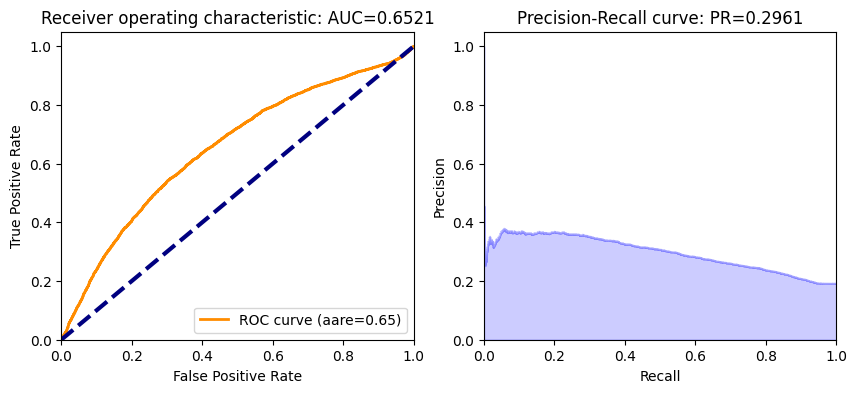

In [84]:
ROC_AUC(dl_tune, test_hex, 'loan_default')

### Tunned Deep Learning result:
During model training, in order to improve the model performance, we tunned hyperparameters(hidden layers and learn_rate). Then we trained the deep learning model with the 'best' hyperparameters according to the tunning results.  

The final performance of the deep learning 'dl_tune' is AUC = 0.6521 and PR = 0.2961. Since we have noticed that the two calsses in the 'target' are quite uneven, where 0 is almost 3 times of 1 in train dataset. So the AUC score is not as accurate as it usually is. So we should take the PR to evaluate and compare the model performance with futher iterations.

### Tuned Deep Learning result  


In [1]:
%%shell
jupyter nbconvert --to html /content/Assignment_9.ipynb

[NbConvertApp] Converting notebook /content/Assignment_9.ipynb to html
[NbConvertApp] Writing 1233250 bytes to /content/Assignment_9.html
